# RNA-seq analysis is easy as 1-2-3 with limma, Glimma and edgeR
## We are going to analyze 3 different cell-types: basal, luminal progenitor and mature luminal
### Obtained from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4937821/pdf/f1000research-5-10940.pdf
#### Passing to here: February 19th 2018

In [42]:
library(BiocInstaller)
library(limma)
library(edgeR)
library(Mus.musculus)
library(RColorBrewer)
library(car)
library(ggplot2)
library(Glimma)
library(gplots)
library(pheatmap)
library(dplyr)

# The DGE pipeline will be divided as: 
### 1) Import the raw data
### 2) Data pre-processing
### 3) Differential expression analysis

# 1) Import the raw data

In [3]:
setwd("/Users/raziel/R-data/data/")

In [4]:
files <- c("GSM1545535_10_6_5_11.txt.gz", "GSM1545536_9_6_5_11.txt.gz", "GSM1545538_purep53.txt.gz", 
           "GSM1545539_JMS8-2.txt.gz", "GSM1545540_JMS8-3.txt.gz", "GSM1545541_JMS8-4.txt.gz", 
           "GSM1545542_JMS8-5.txt.gz", "GSM1545544_JMS9-P7c.txt.gz", "GSM1545545_JMS9-P8c.txt.gz")

### Brief description of the count data

In [5]:
read.delim(files[1], nrows = 5)

EntrezID,GeneLength,Count
497097,3634,1
100503874,3259,0
100038431,1634,0
19888,9747,0
20671,3130,1


#### Special function of edgeR to import all the data 

In [6]:
x <- readDGE(files = files, columns = c(1,3))

In [7]:
x

An object of class "DGEList"
$samples
                                               files group lib.size
GSM1545535_10_6_5_11.txt GSM1545535_10_6_5_11.txt.gz     1 32863052
GSM1545536_9_6_5_11.txt   GSM1545536_9_6_5_11.txt.gz     1 35335491
GSM1545538_purep53.txt     GSM1545538_purep53.txt.gz     1 57160817
GSM1545539_JMS8-2.txt       GSM1545539_JMS8-2.txt.gz     1 51368625
GSM1545540_JMS8-3.txt       GSM1545540_JMS8-3.txt.gz     1 75795034
GSM1545541_JMS8-4.txt       GSM1545541_JMS8-4.txt.gz     1 60517657
GSM1545542_JMS8-5.txt       GSM1545542_JMS8-5.txt.gz     1 55086324
GSM1545544_JMS9-P7c.txt   GSM1545544_JMS9-P7c.txt.gz     1 21311068
GSM1545545_JMS9-P8c.txt   GSM1545545_JMS9-P8c.txt.gz     1 19958838
                         norm.factors
GSM1545535_10_6_5_11.txt            1
GSM1545536_9_6_5_11.txt             1
GSM1545538_purep53.txt              1
GSM1545539_JMS8-2.txt               1
GSM1545540_JMS8-3.txt               1
GSM1545541_JMS8-4.txt               1
GSM1545542_JMS8-5.txt               1
GSM1545544_JMS9-P7c.txt             1
GSM1545545_JMS9-P8c.txt             1

$counts
           Samples
Tags        GSM1545535_10_6_5_11.txt GSM1545536_9_6_5_11.txt
  497097                           1                       2
  100503874                        0                       0
  100038431                        0                       0
  19888                            0                       1
  20671                            1                       1
           Samples
Tags        GSM1545538_purep53.txt GSM1545539_JMS8-2.txt GSM1545540_JMS8-3.txt
  497097                       342                   526                     3
  100503874                      5                     6                     0
  100038431                      0                     0                     0
  19888                          0                     0                    17
  20671                         76                    40                    33
           Samples
Tags        GSM1545541_JMS8-4.txt GSM1545542_JMS8-5.txt GSM1545544_JMS9-P7c.txt
  497097                        3                   535                       2
  100503874                     0                     5                       0
  100038431                     0                     1                       0
  19888                         2                     0                       1
  20671                        14                    98                      18
           Samples
Tags        GSM1545545_JMS9-P8c.txt
  497097                          0
  100503874                       0
  100038431                       0
  19888                           0
  20671                           8
27174 more rows ...

In [8]:
names(x)

[1] "samples" "counts"

In [9]:
class(x)

[1] "DGEList"
attr(,"package")
[1] "edgeR"

In [10]:
dim(x)

[1] 27179     9

#### Organising sample information 

In [12]:
x$sample %>% dim()

[1] 9 4

In [13]:
colnames(x)

[1] "GSM1545535_10_6_5_11.txt" "GSM1545536_9_6_5_11.txt" 
[3] "GSM1545538_purep53.txt"   "GSM1545539_JMS8-2.txt"   
[5] "GSM1545540_JMS8-3.txt"    "GSM1545541_JMS8-4.txt"   
[7] "GSM1545542_JMS8-5.txt"    "GSM1545544_JMS9-P7c.txt" 
[9] "GSM1545545_JMS9-P8c.txt"

In [14]:
substring(colnames(x), 12, nchar(colnames(x)))

[1] "10_6_5_11.txt" "9_6_5_11.txt"  "purep53.txt"   "JMS8-2.txt"   
[5] "JMS8-3.txt"    "JMS8-4.txt"    "JMS8-5.txt"    "JMS9-P7c.txt" 
[9] "JMS9-P8c.txt"

In [21]:
samplenames <- substring(colnames(x), 12, nchar(colnames(x)))

#### Change the name of the samples:

In [16]:
colnames(x) <- samplenames

#### Change the name of the groups by cell-types: Basal, Luminal Progenitor, Mature Luminal

In [29]:
group <- as.factor(c("LP", "ML", "Basal", "Basal", "ML", "LP", "Basal", "ML", "LP"))

In [18]:
x$samples$group

[1] 1 1 1 1 1 1 1 1 1
Levels: 1

In [19]:
x$samples$group <- group

In [20]:
x$samples

,files,group,lib.size,norm.factors
10_6_5_11.txt,GSM1545535_10_6_5_11.txt.gz,LP,32863052,1
9_6_5_11.txt,GSM1545536_9_6_5_11.txt.gz,ML,35335491,1
purep53.txt,GSM1545538_purep53.txt.gz,Basal,57160817,1
JMS8-2.txt,GSM1545539_JMS8-2.txt.gz,Basal,51368625,1
JMS8-3.txt,GSM1545540_JMS8-3.txt.gz,ML,75795034,1
JMS8-4.txt,GSM1545541_JMS8-4.txt.gz,LP,60517657,1
JMS8-5.txt,GSM1545542_JMS8-5.txt.gz,Basal,55086324,1
JMS9-P7c.txt,GSM1545544_JMS9-P7c.txt.gz,ML,21311068,1
JMS9-P8c.txt,GSM1545545_JMS9-P8c.txt.gz,LP,19958838,1


#### Add batch effect: 

In [31]:
lane <- as.factor(rep( c("L004", "L006", "L008"), c(3,4,2))) 

In [22]:
x$samples$lane <- lane #using x$sample$what.ever.you.want.to.add 

In [23]:
x$samples

,files,group,lib.size,norm.factors,lane
10_6_5_11.txt,GSM1545535_10_6_5_11.txt.gz,LP,32863052,1,L004
9_6_5_11.txt,GSM1545536_9_6_5_11.txt.gz,ML,35335491,1,L004
purep53.txt,GSM1545538_purep53.txt.gz,Basal,57160817,1,L004
JMS8-2.txt,GSM1545539_JMS8-2.txt.gz,Basal,51368625,1,L006
JMS8-3.txt,GSM1545540_JMS8-3.txt.gz,ML,75795034,1,L006
JMS8-4.txt,GSM1545541_JMS8-4.txt.gz,LP,60517657,1,L006
JMS8-5.txt,GSM1545542_JMS8-5.txt.gz,Basal,55086324,1,L006
JMS9-P7c.txt,GSM1545544_JMS9-P7c.txt.gz,ML,21311068,1,L008
JMS9-P8c.txt,GSM1545545_JMS9-P8c.txt.gz,LP,19958838,1,L008


### Organism gene annotation 

In [24]:
rownames(x)[1:10]

[1] "497097"    "100503874" "100038431" "19888"     "20671"     "27395"    
 [7] "18777"     "100503730" "21399"     "58175"

In [ ]:
##There's a problem with the 'select' function from the library Mus.musculus in Jupyter. So we're going to import the
##R-object only for demostration purpose. In reallity all the pipeline will be applied in Rstudio

In [38]:
##The commands used where: 
# geneid <- rownames(x)
# genes <- select(Mus.musculus, keys = geneid, columns = c("SYMBOL", "TXCHROM"), keytype = "ENTREZID")
# genes <- genes[!duplicated(genes$ENTREZID),] ## Explanation: 
                                                # There're genes to map more than once to a genome segment, we're going
                                                # to select only the first occurrence of each gene ID for simplicity
# x$genes <- genes

In [4]:
load("/Users/raziel/R-data/data/X.genes.mus.musculus.rda")

In [6]:
names(x)

[1] "samples" "counts"  "genes"

In [7]:
x$genes %>% head() 

ENTREZID,SYMBOL,TXCHROM
497097,Xkr4,chr1
100503874,Gm19938,NA
100038431,Gm10568,NA
19888,Rp1,chr1
20671,Sox17,chr1
27395,Mrpl15,chr1


# 2) Data pre-processing

#### Transform the raw-data to: Counts per Million (CPM) using  the edgeR function 'cpm' 
##### The raw counts divided by the library sizes and multiplied by one million

##### Alternatively you can convert raw-data to FPKM or TPM: https://gist.github.com/slowkow/c6ab0348747f86e2748b

In [8]:
x$counts %>% head()

,10_6_5_11.txt,9_6_5_11.txt,purep53.txt,JMS8-2.txt,JMS8-3.txt,JMS8-4.txt,JMS8-5.txt,JMS9-P7c.txt,JMS9-P8c.txt
497097,1,2,342,526,3,3,535,2,0
100503874,0,0,5,6,0,0,5,0,0
100038431,0,0,0,0,0,0,1,0,0
19888,0,1,0,0,17,2,0,1,0
20671,1,1,76,40,33,14,98,18,8
27395,431,771,1368,1268,1564,769,818,468,342


In [9]:
cpm(x) %>% head() 

,10_6_5_11.txt,9_6_5_11.txt,purep53.txt,JMS8-2.txt,JMS8-3.txt,JMS8-4.txt,JMS8-5.txt,JMS9-P7c.txt,JMS9-P8c.txt
497097,0.03042931,0.05660032,5.98311952,10.2397134,0.03958043,0.04957231,9.71202943,0.09384795,0.0000000
100503874,0.00000000,0.00000000,0.08747251,0.1168028,0.00000000,0.00000000,0.09076663,0.00000000,0.0000000
100038431,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.01815333,0.00000000,0.0000000
19888,0.00000000,0.02830016,0.00000000,0.0000000,0.22428910,0.03304821,0.00000000,0.04692397,0.0000000
20671,0.03042931,0.02830016,1.32958212,0.7786854,0.43538472,0.23133744,1.77902595,0.84463153,0.4008249
27395,13.11503265,21.81942229,23.93247808,24.6843282,20.63459725,12.70703524,14.84942070,21.96041982,17.1352661


In [10]:
cpm <- cpm(x) 

In [11]:
lcpm <- cpm(x, log=TRUE)

#### Remove the genes that are lowly expressed

In [12]:
table(rowSums(x$counts == 0)==9)


FALSE  TRUE 
22026  5153 

#### Cutoff of CPM > 1 in at least one replicate

In [13]:
keep.exprs <- rowSums(cpm > 1) >= 3

In [14]:
x <- x[keep.exprs, , keep.lib.sizes = FALSE] #remove the genes and the counts

In [15]:
dim(x)

[1] 14165     9

#### Plot the difference between before and after remove the genes lowly expressed

In [16]:
nsamples <- ncol(x)

In [19]:
col <- brewer.pal(nsamples, "Paired")

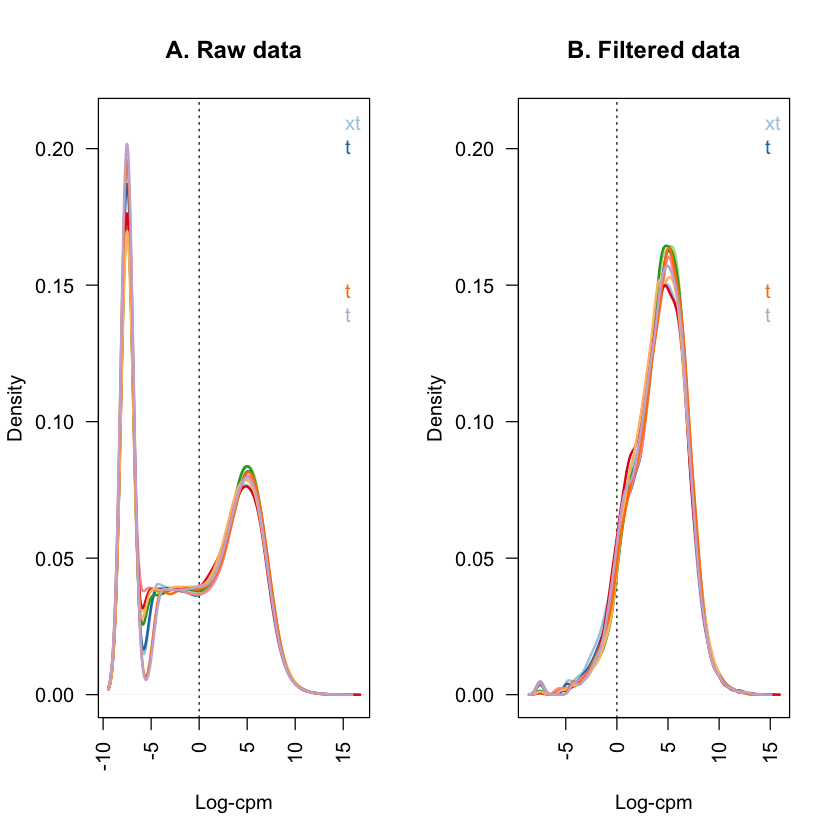

In [22]:
par(mfrow=c(1,2))

plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, main="", xlab="")
title(main = "A. Raw data", xlab = "Log-cpm")
abline(v=0, lty=3)

for(i in 2:nsamples){
  
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
  
}

legend("topright", samplenames, text.col = col, bty = "n")

lcpm <- cpm(x, log=TRUE)

plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, main="", xlab="")
title(main = "B. Filtered data", xlab = "Log-cpm")
abline(v=0, lty=3)

for(i in 2:nsamples){
  
 den <- density(lcpm[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
  
}

legend("topright", samplenames, text.col = col, bty = "n")

#### Normalization (TMM)of the CPM 

In [23]:
x <- calcNormFactors(x, method = "TMM")

In [24]:
x$samples

,files,group,lib.size,norm.factors,lane
10_6_5_11.txt,GSM1545535_10_6_5_11.txt.gz,LP,32832881,0.8957309,L004
9_6_5_11.txt,GSM1545536_9_6_5_11.txt.gz,ML,35296067,1.0349196,L004
purep53.txt,GSM1545538_purep53.txt.gz,Basal,57089259,1.0439552,L004
JMS8-2.txt,GSM1545539_JMS8-2.txt.gz,Basal,51304051,1.0405040,L006
JMS8-3.txt,GSM1545540_JMS8-3.txt.gz,ML,75724862,1.0323599,L006
JMS8-4.txt,GSM1545541_JMS8-4.txt.gz,LP,60457787,0.9223424,L006
JMS8-5.txt,GSM1545542_JMS8-5.txt.gz,Basal,55014064,0.9836603,L006
JMS9-P7c.txt,GSM1545544_JMS9-P7c.txt.gz,ML,21282257,1.0827381,L008
JMS9-P8c.txt,GSM1545545_JMS9-P8c.txt.gz,LP,19938942,0.9792607,L008


#### Observe the visual effect of normalization

In [25]:
x2 <- x

x2$samples$norm.factors <- 1

x2$counts[,1] <- ceiling(x2$counts[,1]*0.05) #Computational modification of the first column
x2$counts[,2] <- x2$counts[,2]*5 #Computational modification of the second column

[1] 0.05472223 6.13059440 1.22927355 1.17051887 1.21487709 1.05622968 1.14587663
[8] 1.26129350 1.11702264

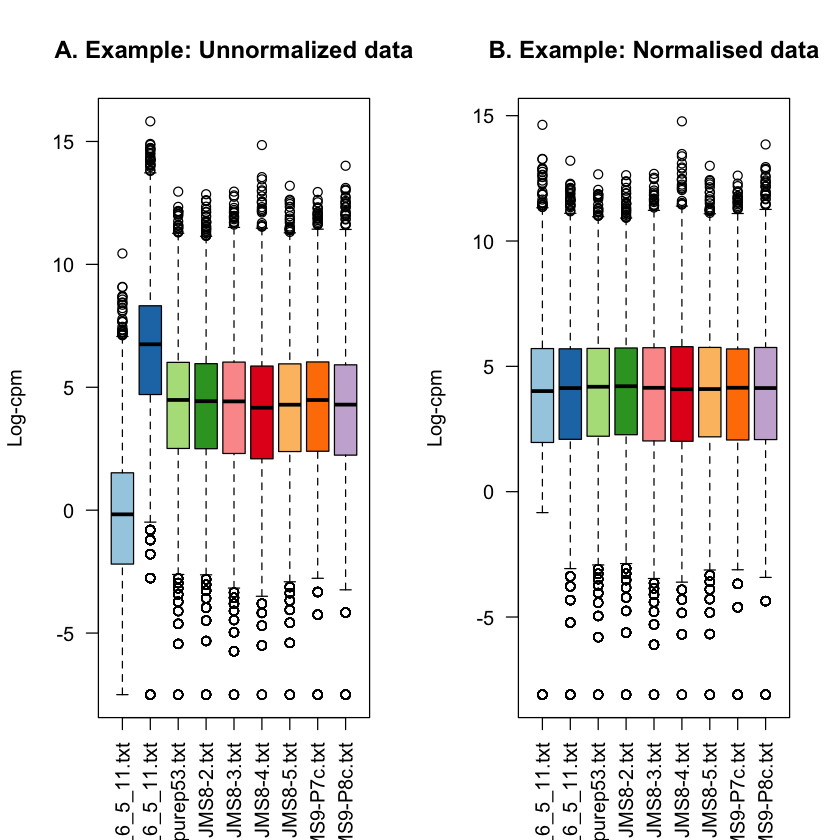

In [26]:
par(mfrow=c(1,2))

lcpm <- cpm(x2, log=TRUE) 

boxplot(lcpm, las=2, col=col, main="")
title(main = "A. Example: Unnormalized data", ylab = "Log-cpm")

x2 <- calcNormFactors(x2)

x2$samples$norm.factors

lcpm <- cpm(x2, log=TRUE)

boxplot(lcpm, las=2, col=col, main="")
title(main = "B. Example: Normalised data", y="Log-cpm")

#### Unsupervised clustering of samples

##### MDS: Multidimensional scaling 

In [27]:
lcpm <- cpm(x, log=TRUE)

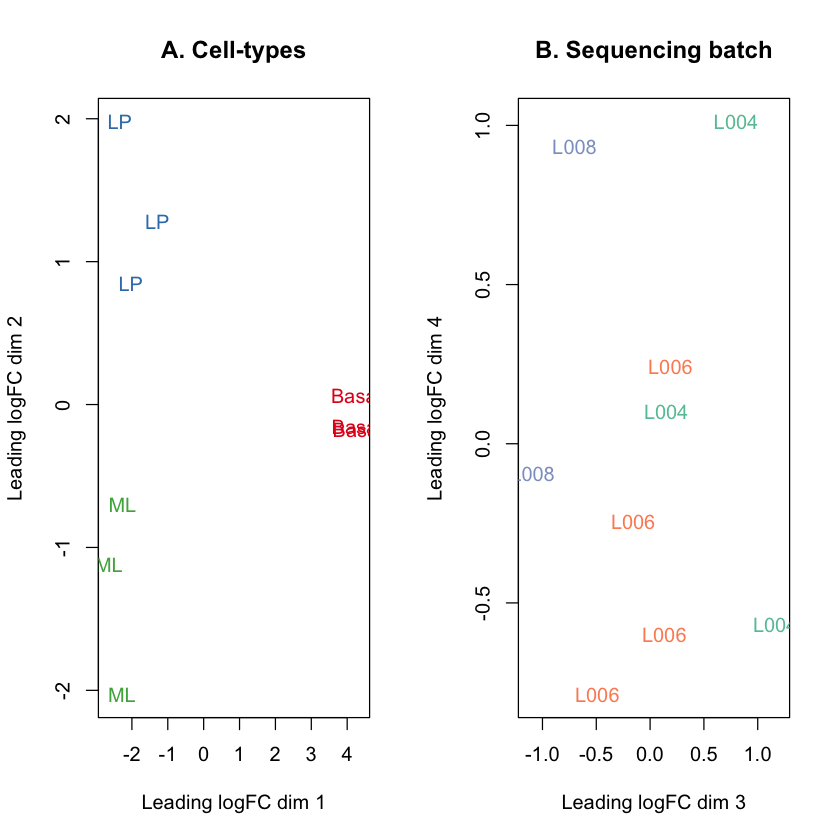

In [32]:
par(mfrow=c(1,2))

#Group: cell-type

col.group <- group
levels(col.group) <- brewer.pal(nlevels(col.group), "Set1")
col.group <- as.character(col.group)

#Lane: sequencing batch 

col.lane <- lane
levels(col.lane) <- brewer.pal(nlevels(col.lane), "Set2")
col.lane <- as.character(col.lane)

plotMDS(lcpm, labels = group, col=col.group)
title(main = "A. Cell-types")

#Dimension 3 and 4 

plotMDS(lcpm, labels = lane, col=col.lane, dim=c(3,4))
title(main = "B. Sequencing batch")

# 3) Differential Expression Analysis

#### Creating a design matrix and contrasts

In [33]:
design <- model.matrix(~ 0+group+lane)

In [34]:
design

,groupBasal,groupLP,groupML,laneL006,laneL008
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,1,0
5,0,0,1,1,0
6,0,1,0,1,0
7,1,0,0,1,0
8,0,0,1,0,1
9,0,1,0,0,1


In [35]:
x$samples

,files,group,lib.size,norm.factors,lane
10_6_5_11.txt,GSM1545535_10_6_5_11.txt.gz,LP,32832881,0.8957309,L004
9_6_5_11.txt,GSM1545536_9_6_5_11.txt.gz,ML,35296067,1.0349196,L004
purep53.txt,GSM1545538_purep53.txt.gz,Basal,57089259,1.0439552,L004
JMS8-2.txt,GSM1545539_JMS8-2.txt.gz,Basal,51304051,1.0405040,L006
JMS8-3.txt,GSM1545540_JMS8-3.txt.gz,ML,75724862,1.0323599,L006
JMS8-4.txt,GSM1545541_JMS8-4.txt.gz,LP,60457787,0.9223424,L006
JMS8-5.txt,GSM1545542_JMS8-5.txt.gz,Basal,55014064,0.9836603,L006
JMS9-P7c.txt,GSM1545544_JMS9-P7c.txt.gz,ML,21282257,1.0827381,L008
JMS9-P8c.txt,GSM1545545_JMS9-P8c.txt.gz,LP,19938942,0.9792607,L008


In [36]:
colnames(design) <- gsub("group", "", colnames(design))

In [37]:
design

,Basal,LP,ML,laneL006,laneL008
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,1,0
5,0,0,1,1,0
6,0,1,0,1,0
7,1,0,0,1,0
8,0,0,1,0,1
9,0,1,0,0,1


#### Limma function: 'makeContrasts' for make pairwise comparisons between Cell-types

In [38]:
contr.matrix <- makeContrasts( #limma function: pairwise comparisons between cell populations 
  
  BasalvsLP= Basal-LP,
  BasalvsML= Basal - ML, 
  LPvsML= LP - ML, 
  levels = colnames(design)
  
)

In [39]:
contr.matrix

,BasalvsLP,BasalvsML,LPvsML
Basal,1,1,0
LP,-1,0,1
ML,0,-1,-1
laneL006,0,0,0
laneL008,0,0,0


### Removing heteroscedascity from count data
#### RNA-seq count data: the variance is not independent of the mean; this is true in raw caounts and logCPM
#### Methods that model counts using a Negative Binomial distribution (edgeR, DeSeq2) assume a quadratic mean-variance relationship.
#### In limma, linear modelling ('lmFit' and 'contrasts.fit') is carried out on the log-CPM which are assumed to be normally distributed and the mean-variance relationship is accommodated using _precision_weights_ calculated by the _'voom' function_


In [40]:
lcpm <- cpm(x, log=TRUE)

#### Knowing the distribution of the counts:

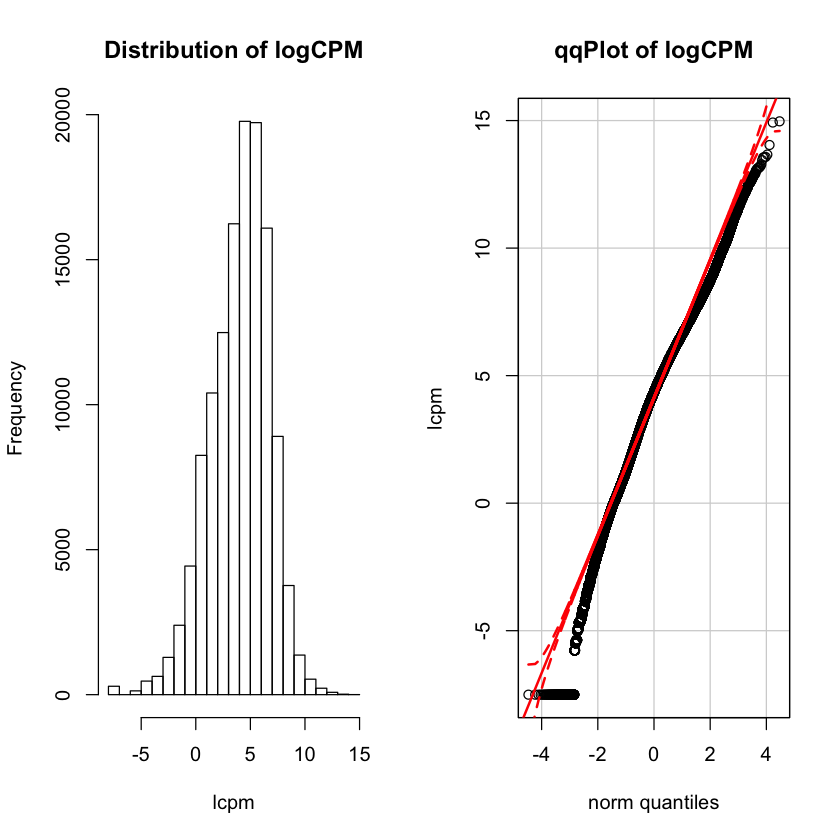

In [42]:
par(mfrow=c(1,2))
hist(lcpm, main="Distribution of logCPM")
qqPlot(lcpm, main="qqPlot of logCPM")

### Precision weights:

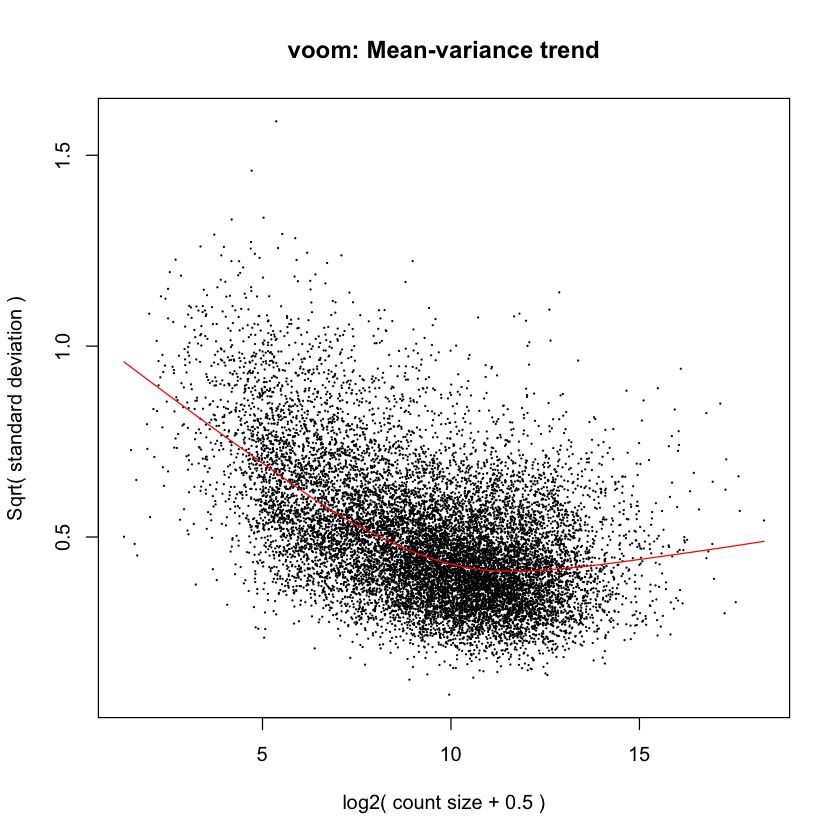

In [43]:
v <- voom(x, design = design, plot = TRUE)

In [44]:
class(v)

[1] "EList"
attr(,"package")
[1] "limma"

### Linear modelling: 'lmFit' and 'contrasts.fit'

In [45]:
vfit <- lmFit(v, design = design)

In [48]:
names(vfit)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "pivot"            "rank"             "genes"           
 [9] "Amean"            "method"           "design"

In [49]:
vfit <- contrasts.fit(vfit, contrasts = contr.matrix)

In [50]:
names(vfit)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "rank"             "genes"            "Amean"           
 [9] "method"           "design"           "contrasts"

### Empirical Bayes moderation: gene-wise variability

In [51]:
efit <- eBayes(vfit)

In [52]:
names(efit)

[1] "coefficients"     "stdev.unscaled"   "sigma"            "df.residual"     
 [5] "cov.coefficients" "rank"             "genes"            "Amean"           
 [9] "method"           "design"           "contrasts"        "df.prior"        
[13] "s2.prior"         "var.prior"        "proportion"       "s2.post"         
[17] "t"                "df.total"         "p.value"          "lods"            
[21] "F"                "F.p.value"

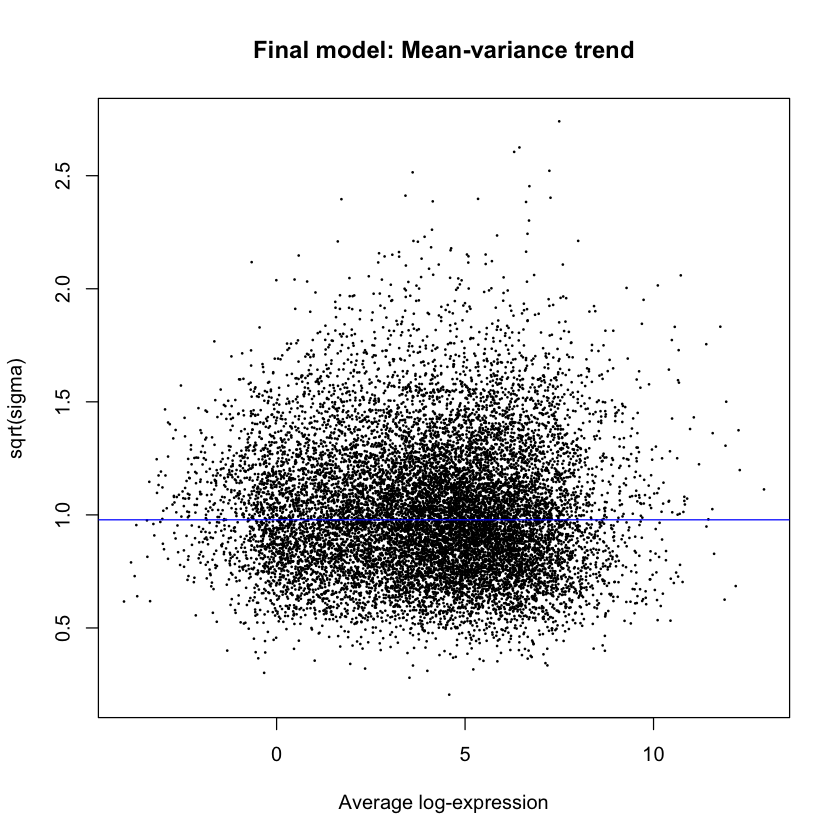

In [53]:
plotSA(efit)
title(main = "Final model: Mean-variance trend")

### Brief analysis of the DGE output: adjusted p-value of 5%

#### Meaning: 0= notDE, -1= downregulated, 1= up-regulated 

In [54]:
summary(decideTests(efit))

   BasalvsLP BasalvsML LPvsML
-1      4127      4338   2895
0       5740      5655   8825
1       4298      4172   2445

#### Some studies requiere more than an adjusted p-value cutoff, other criterion is the logFold-Change (logFC)

#### The 'treat' function can be used to calculate p-values from empirical Bayes moderated t-statistics with a minimum log-FC-requirment 
#### Log(Fold-Change)=1 means: a fold-change of 3 three-times

In [55]:
tfit <- treat(vfit, lfc = 1)

In [56]:
summary(decideTests(tfit)) 

   BasalvsLP BasalvsML LPvsML
-1      1417      1512    203
0      11030     10895  13780
1       1718      1758    182

In [57]:
dt <- decideTests(tfit)

In [58]:
dim(dt)

[1] 14165     3

In [59]:
head(dt)

,BasalvsLP,BasalvsML,LPvsML
497097,1,1,0
27395,0,0,0
18777,0,0,0
21399,0,0,0
58175,-1,-1,0
108664,0,0,0


#### Genes that are DE in multiple comparisons

In [60]:
de.common <- which(dt[,1] != 0 & dt[,2] != 0)

In [61]:
length(de.common)

[1] 2409

In [62]:
tfit$genes$SYMBOL[de.common] %>% head(n=50)

[1] "Xkr4"          "Rgs20"         "Cpa6"          "Sulf1"        
 [5] "Eya1"          "Msc"           "Sbspon"        "Pi15"         
 [9] "Crispld1"      "Kcnq5"         "Ptpn18"        "Arhgef4"      
[13] "2010300C02Rik" "Aff3"          "Npas2"         "Tbc1d8"       
[17] "Creg2"         "Il1r1"         "Il18r1"        "Il18rap"      
[21] "1500015O10Rik" "Kdelc1"        "Col5a2"        "Slc39a10"     
[25] "Sdpr"          "1700019D03Rik" "Plcl1"         "Sgol2a"       
[29] "Fzd7"          "Nrp2"          "Erbb4"         "Bard1"        
[33] "Abca12"        "Mreg"          "Igfbp2"        "Tns1"         
[37] "Rufy4"         "Cyp27a1"       "Wnt6"          "Wnt10a"       
[41] "Speg"          "Obsl1"         "Epha4"         "Serpine2"     
[45] "Dock10"        "Col4a3"        "Ccl20"         "Ecel1"        
[49] "3110079O15Rik" "Ngef"

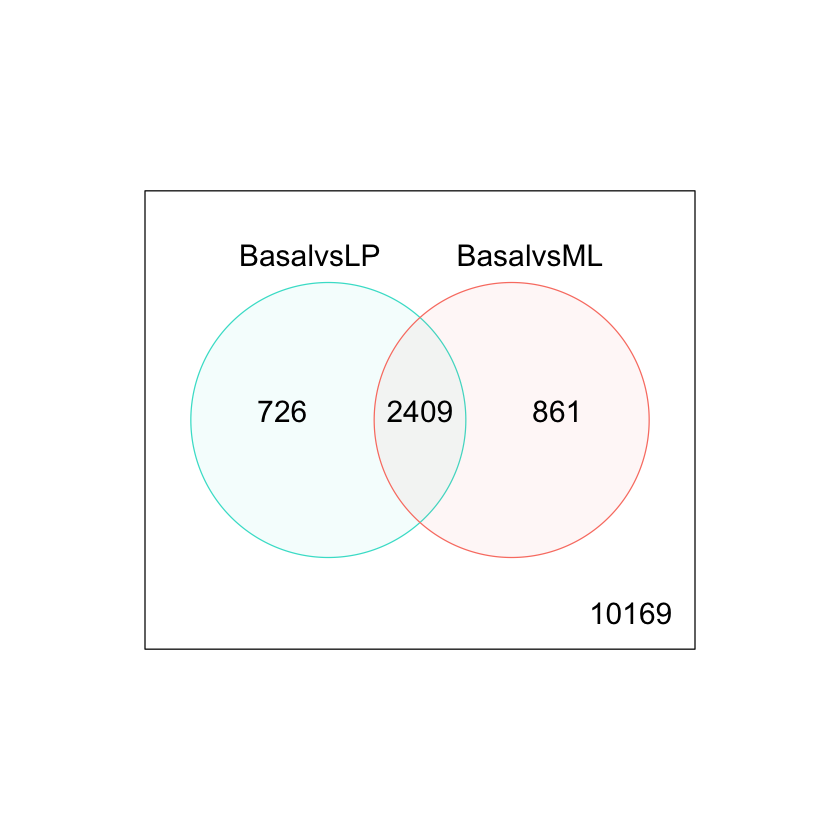

In [63]:
vennDiagram(dt[,1:2], circle.col = c("turquoise", "salmon"))

### Examining individual DE genes from top to bottom
#### By default 'topTreat' arranges genes from smallest to lagest adjusted p-value. Inf option: include all genes

In [64]:
basal.vs.lp <- topTreat(tfit, coef = 1, n=Inf)

In [65]:
basal.vs.ml <- topTreat(tfit, coef = 1, n=Inf)

In [66]:
head(basal.vs.lp)

,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val
12759,12759,Clu,chr14,-5.442877,8.857907,-33.44429,3.990899e-10,2.703871e-06
53624,53624,Cldn7,chr11,-5.514605,6.296762,-32.94533,4.503694e-10,2.703871e-06
242505,242505,Rasef,chr4,-5.921741,5.119585,-31.77625,6.063249e-10,2.703871e-06
67451,67451,Pkp2,chr16,-5.724823,4.420495,-30.65370,8.010456e-10,2.703871e-06
228543,228543,Rhov,chr2,-6.253427,5.486640,-29.46244,1.112729e-09,2.703871e-06
70350,70350,Basp1,chr15,-6.073297,5.248349,-28.64890,1.380545e-09,2.703871e-06


In [67]:
head(basal.vs.ml)

,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val
12759,12759,Clu,chr14,-5.442877,8.857907,-33.44429,3.990899e-10,2.703871e-06
53624,53624,Cldn7,chr11,-5.514605,6.296762,-32.94533,4.503694e-10,2.703871e-06
242505,242505,Rasef,chr4,-5.921741,5.119585,-31.77625,6.063249e-10,2.703871e-06
67451,67451,Pkp2,chr16,-5.724823,4.420495,-30.65370,8.010456e-10,2.703871e-06
228543,228543,Rhov,chr2,-6.253427,5.486640,-29.46244,1.112729e-09,2.703871e-06
70350,70350,Basp1,chr15,-6.073297,5.248349,-28.64890,1.380545e-09,2.703871e-06


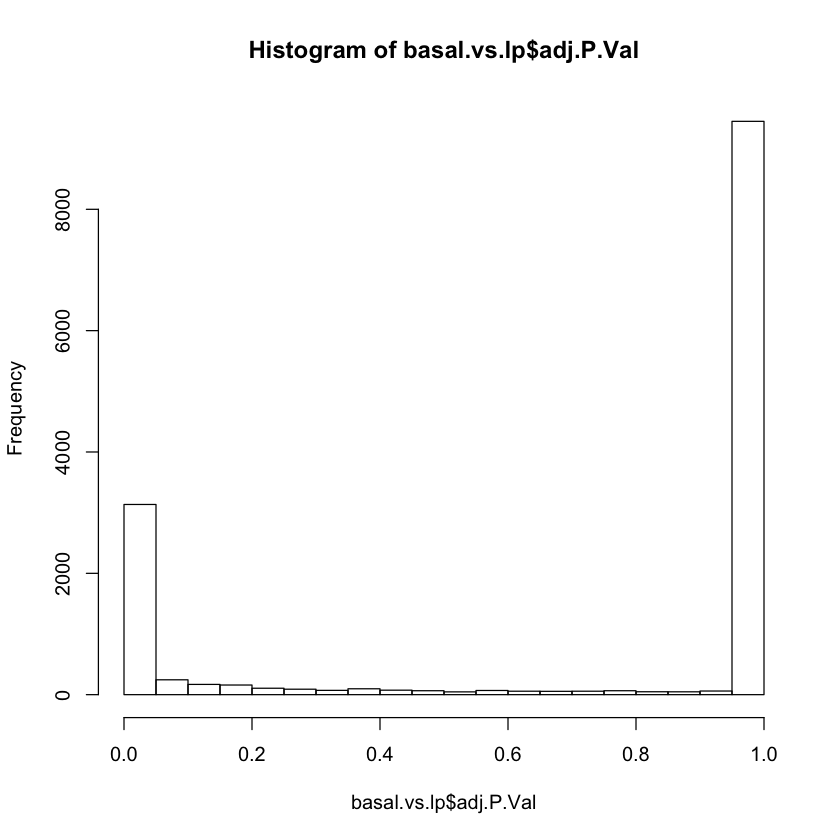

In [68]:
hist(basal.vs.lp$adj.P.Val)

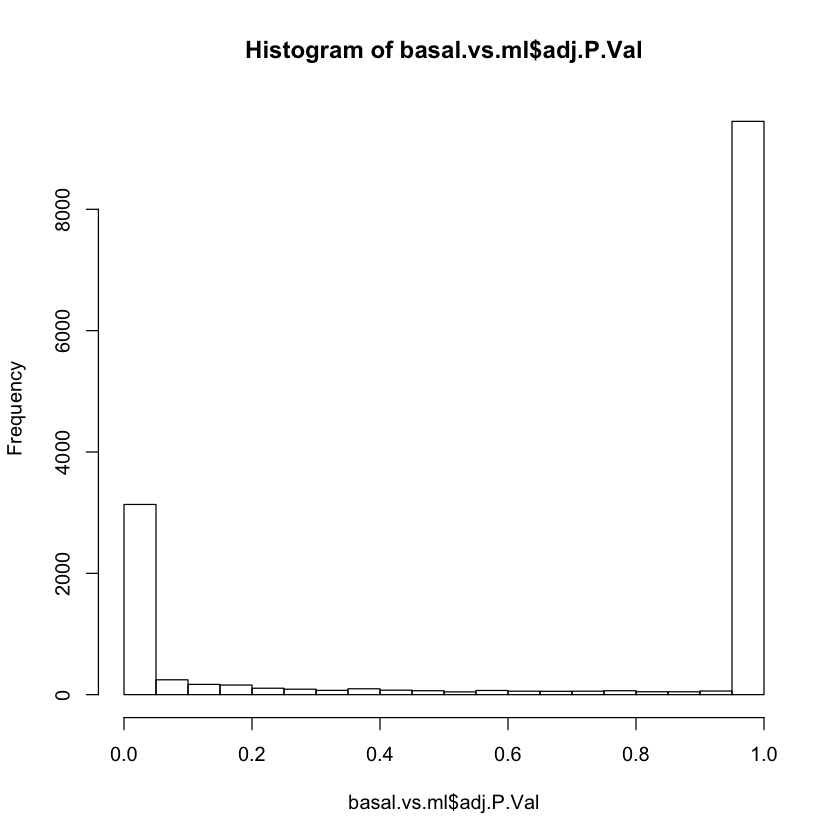

In [69]:
hist(basal.vs.ml$adj.P.Val)

# Useful graphical representations of differential expression results 

### Volcano plot

In [70]:
basal.vs.lp$Significant <- ifelse(basal.vs.lp$adj.P.Val < 0.01, "FDR < 0.01", "Not Sig")

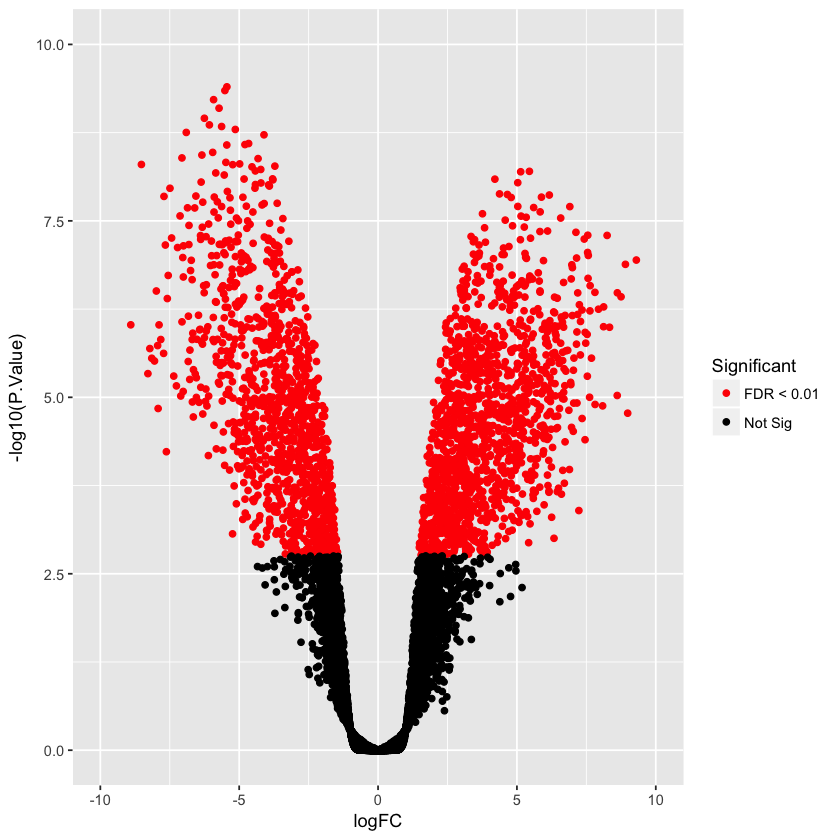

In [73]:
ggplot(data = basal.vs.lp, aes(x=logFC, y=-log10(P.Value)))+geom_point(aes(color=Significant))+
  xlim(c(-10,10))+scale_color_manual(values = c("red", "black"))+ylim(c(0,10))

In [74]:
basal.vs.ml$Significant <- ifelse(basal.vs.ml$adj.P.Val < 0.01, "FDR < 0.01", "Not Sig")

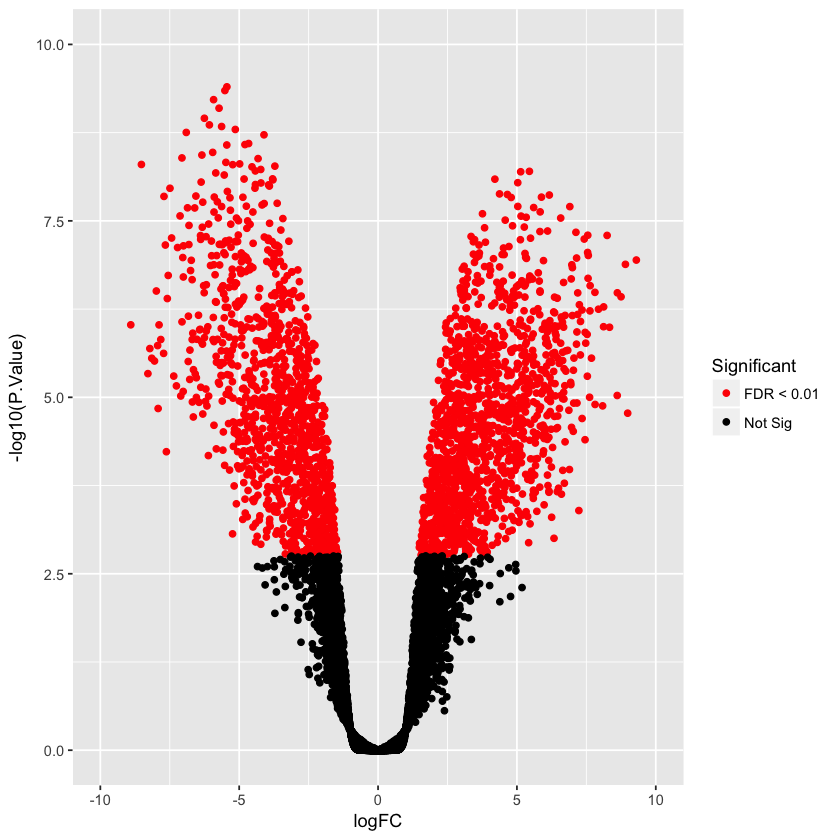

In [75]:
ggplot(data = basal.vs.ml, aes(x=logFC, y=-log10(P.Value)))+geom_point(aes(color=Significant))+
  xlim(c(-10,10))+scale_color_manual(values = c("red", "black"))+ylim(c(0,10))

### Mean-Difference Plot of Expression data

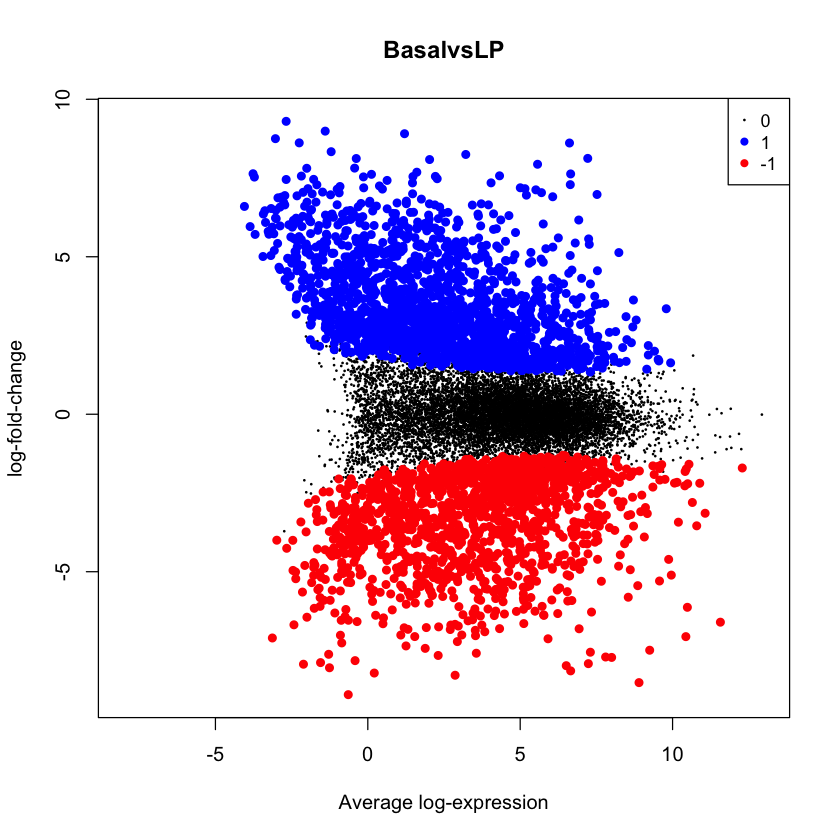

In [76]:
plotMD(tfit, column = 1, status = dt[,1], main = colnames(tfit)[1], xlim=c(-8, 13),
       hl.col=c("blue","red"))

### Heatmap
#### Of the top 100 DE genes (ranked by adjusted p.value). Expression across each gene have been scaled so that mean expression is zero and standard deviation is 1= Classical Normal Distribution 

#### Top100 DE genes of BasalvsLP

In [77]:
basal.vs.lp.topgenes <-  basal.vs.lp$ENTREZID[1:100]

#### Obtain the name of the genes from the list 'v' and select the top 100 DE genes (ranked by adjusted p.value)

In [78]:
i <- which(v$genes$ENTREZID %in% basal.vs.lp.topgenes)

#### Colors:

In [83]:
mycol <- colorpanel(1000, "blue", "white", "red")

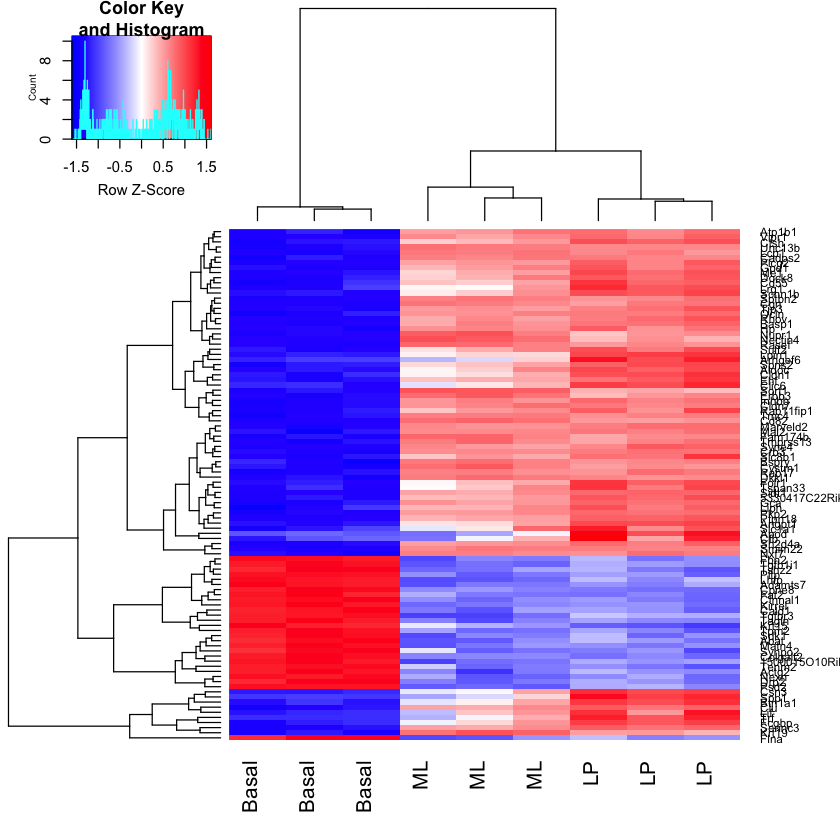

In [91]:
heatmap.2(v$E[i,], col = mycol, labCol = group, trace="none", scale="row", labRow = v$genes$SYMBOL[i])